In [2]:
import pandas as pd
data = pd.read_excel(r'/Users/annaleefoust/Downloads/commerce_data.xlsx')

In [4]:
data

,product_price,discount,viewer,likes,sales
0,11700,0.29,650000,180000,11700
1,17400,0.44,650000,180000,87000
2,14000,0.47,650000,180000,8540000
3,29100,0.29,410000,18000,5063400
4,32000,NaN,350000,15000,1024000
...,...,...,...,...,...
2898,1590,0.27,1271,4509,19080
2899,1390,0.26,1271,4509,31970
2900,1390,0.26,1271,4509,111200
2901,990,0.34,1271,4509,124740


In [6]:
data = data.fillna(0)

In [8]:
k_data = data[['discount', 'sales']]

In [10]:
k_data

,discount,sales
0,0.29,11700
1,0.44,87000
2,0.47,8540000
3,0.29,5063400
4,0.00,1024000
...,...,...
2898,0.27,19080
2899,0.26,31970
2900,0.26,111200
2901,0.34,124740


In [12]:
k_data = k_data.values

In [14]:
k_data

array([[2.9000e-01, 1.1700e+04],
       [4.4000e-01, 8.7000e+04],
       [4.7000e-01, 8.5400e+06],
       ...,
       [2.6000e-01, 1.1120e+05],
       [3.4000e-01, 1.2474e+05],
       [0.0000e+00, 1.9500e+05]])

In [16]:
from sklearn.cluster import KMeans

In [18]:
optimal_k = []

In [20]:
for i in range(2, 51):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 10, n_init = 10, random_state = 0)
    kmeans.fit(k_data)
    res = kmeans.inertia_
    optimal_k.append(res)

In [22]:
import matplotlib.pyplot as plt

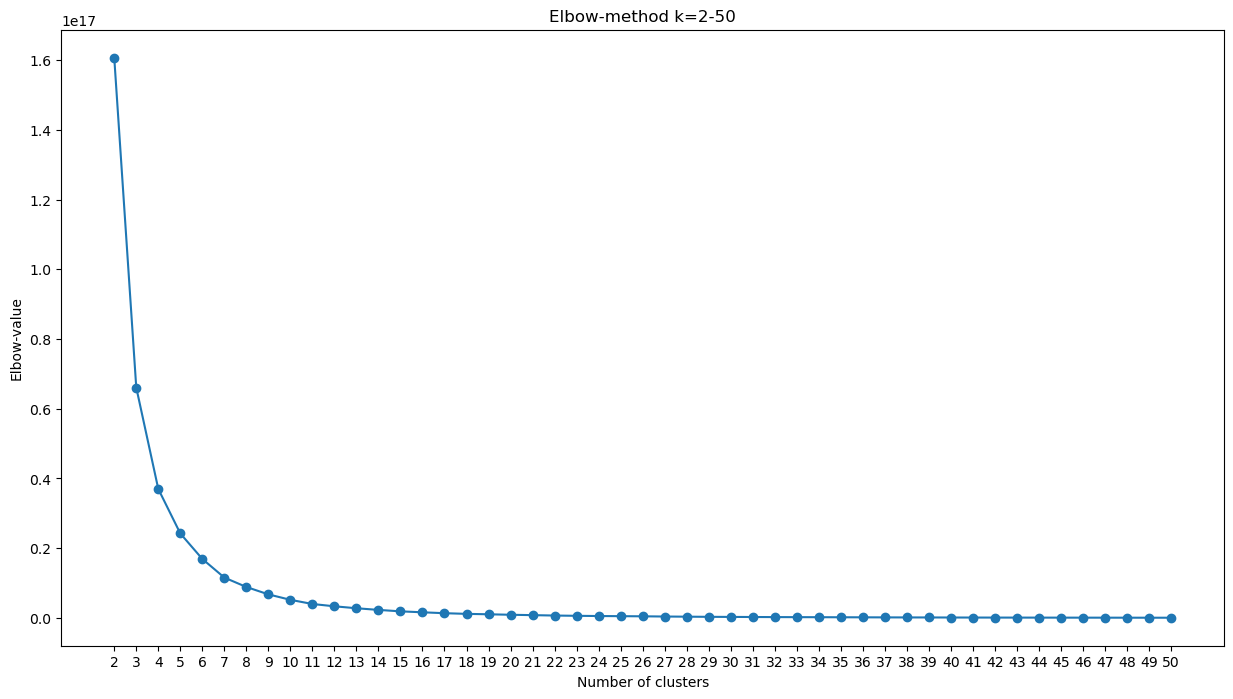

In [24]:
plt.figure(figsize = (15, 8))
plt.plot(range(2,51), optimal_k, marker = 'o')
plt.title('Elbow-method k=2-50')
plt.xlabel('Number of clusters')
plt.ylabel('Elbow-value')
plt.xticks(range(2,51))
plt.show()

In [26]:
optimal_kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 10, n_init = 10, random_state = 0)
optimal_kmeans.fit(k_data)

KMeans(max_iter=10, n_clusters=3, n_init=10, random_state=0)

In [28]:
y_pred = optimal_kmeans.predict(k_data)

In [30]:
import seaborn as sb

In [32]:
color = ['red', 'blue', 'green']

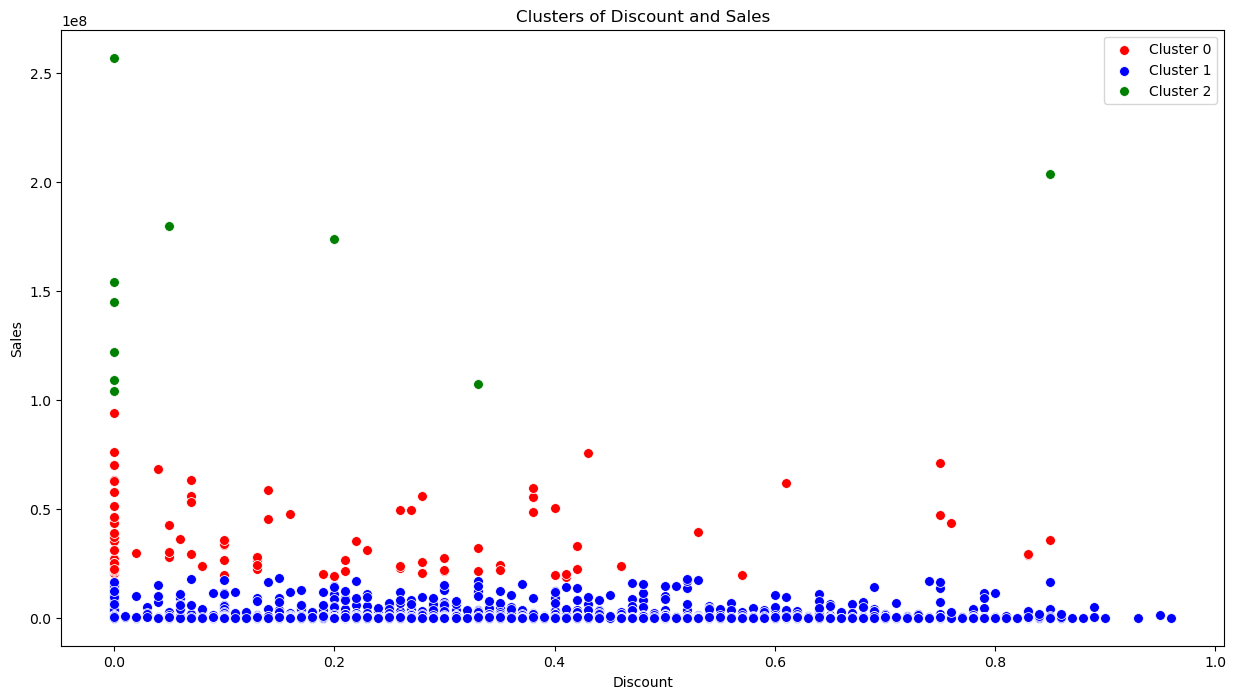

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))

for i in range(3):
    sns.scatterplot(x=k_data[y_pred == i, 0], 
                    y=k_data[y_pred == i, 1], 
                    color=color[i], 
                    label='Cluster ' + str(i),
                    s=50)  # 's' is not a valid argument for sns.scatterplot, should be 'size'

plt.title('Clusters of Discount and Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [40]:
data['cluster'] = y_pred

In [42]:
data

,product_price,discount,viewer,likes,sales,cluster
0,11700,0.29,650000,180000,11700,1
1,17400,0.44,650000,180000,87000,1
2,14000,0.47,650000,180000,8540000,1
3,29100,0.29,410000,18000,5063400,1
4,32000,0.00,350000,15000,1024000,1
...,...,...,...,...,...,...
2898,1590,0.27,1271,4509,19080,1
2899,1390,0.26,1271,4509,31970,1
2900,1390,0.26,1271,4509,111200,1
2901,990,0.34,1271,4509,124740,1


In [44]:
data[data['cluster'] ==0]

,product_price,discount,viewer,likes,sales,cluster
25,29290,0.41,250000,44000,18862760,0
26,36250,0.42,250000,44000,22293750,0
31,158000,0.40,230000,28000,50402000,0
33,39900,0.00,220000,100000,27211800,0
51,29900,0.40,180000,33000,19405100,0
...,...,...,...,...,...,...
2166,360000,0.00,4521,14000,22320000,0
2214,1770000,0.10,4251,49000,19470000,0
2215,499000,0.21,4251,49000,26447000,0
2499,1850000,0.13,3079,16000,24050000,0


In [46]:
data[data['cluster'] ==1]

,product_price,discount,viewer,likes,sales,cluster
0,11700,0.29,650000,180000,11700,1
1,17400,0.44,650000,180000,87000,1
2,14000,0.47,650000,180000,8540000,1
3,29100,0.29,410000,18000,5063400,1
4,32000,0.00,350000,15000,1024000,1
...,...,...,...,...,...,...
2898,1590,0.27,1271,4509,19080,1
2899,1390,0.26,1271,4509,31970,1
2900,1390,0.26,1271,4509,111200,1
2901,990,0.34,1271,4509,124740,1


In [48]:
data[data['cluster'] ==2]

,product_price,discount,viewer,likes,sales,cluster
55,59000,0.85,180000,41000,203844992,2
103,429000,0.00,120000,60000,104247000,2
104,474000,0.00,120000,60000,121818000,2
105,246000,0.00,120000,60000,257070000,2
141,159200,0.20,84000,53000,173846400,2
166,149000,0.33,73000,73000,107131000,2
216,57000,0.05,63000,27000,179835008,2
231,523000,0.00,58000,14000,154284992,2
310,454900,0.00,45000,17000,109176000,2
311,274900,0.00,45000,17000,145147200,2
